- offense vs gang affiliation
- clean up preet + debbie's EDA notebook
- complete process slide

## Notebook Summary
---
This contents of this notebook includes initial EDA

In [239]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [240]:
#read in dataset
recid_df = pd.read_csv('data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')

In [241]:
recid_df.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,False,False,3 or more,3,False,2,2 or more,False,False,False,False,False,True,True,False,False,False,False,False,0,6,0,2,612.000000,0.0,0.0,0.0,0.0,0.488562,0.44761,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.0,0.0,0.0,0.0,0.425234,2.00000,False,True,False,False,True,1


In [242]:
recid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [243]:
#overall recid rate
recid_df['Recidivism_Within_3years'].sum()/recid_df['Recidivism_Within_3years'].count()

0.5768918134313915

In [244]:
df_cat = recid_df.select_dtypes(include = 'object').copy()
df_numeric = recid_df.select_dtypes(include = ['float64','int64']).copy()
df_bool = recid_df.select_dtypes(include = 'bool').copy()

In [245]:
df_cat.head(2)

,Gender,Race,Age_at_Release,Gang_Affiliated,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes
0,M,BLACK,43-47,False,Standard,At least some college,3 or more,Drug,More than 3 years,6,6 or more,1,3,3,4,3 or more,3,2,2 or more,0,6,0,2
1,M,BLACK,33-37,False,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,3 or more,4 or more,0,2 or more,4 or more,0,0,2


In [246]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

uniq_vals_df = pd.DataFrame(columns = ['column', 'values'])

uniq_vals = pd.DataFrame()

for c in df_cat.columns:
    uniq_vals['column'] = [c]
    uniq_vals['values'] = [df_cat[c].unique()]
    uniq_vals_df = uniq_vals_df.append(uniq_vals)

uniq_vals_df

,column,values
0,Gender,"[M, F]"
0,Race,"[BLACK, WHITE]"
0,Age_at_Release,"[43-47, 33-37, 48 or older, 38-42, 18-22, 23-27, 28-32]"
0,Gang_Affiliated,"[False, nan, True]"
0,Supervision_Level_First,"[Standard, Specialized, High, nan]"
0,Education_Level,"[At least some college, Less than HS diploma, High School Diploma]"
0,Dependents,"[3 or more, 1, 0, 2]"
0,Prison_Offense,"[Drug, Violent/Non-Sex, Property, nan, Other, Violent/Sex]"
0,Prison_Years,"[More than 3 years, 1-2 years, Less than 1 year, Greater than 2 to 3 years]"
0,Prior_Arrest_Episodes_Felony,"[6, 7, 8, 4, 10 or more, 3, 9, 2, 5, 1, 0]"


In [247]:
df_numeric.head(2)

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Training_Sample
0,1,16,3.0,612.000000,0.0,0.0,0.0,0.0,0.488562,0.44761,1
1,2,16,6.0,35.666667,0.0,0.0,0.0,0.0,0.425234,2.00000,1


In [248]:
# create separate df for recidivism within 3 years T or F
recid_true = recid_df[(recid_df['Recidivism_Within_3years'] == True)].copy()
recid_false = recid_df[(recid_df['Recidivism_Within_3years'] == False)].copy()

In [249]:
recid_true.head(2)

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,Prison_Offense,Prison_Years,Prior_Arrest_Episodes_Felony,Prior_Arrest_Episodes_Misd,Prior_Arrest_Episodes_Violent,Prior_Arrest_Episodes_Property,Prior_Arrest_Episodes_Drug,Prior_Arrest_Episodes_PPViolationCharges,Prior_Arrest_Episodes_DVCharges,Prior_Arrest_Episodes_GunCharges,Prior_Conviction_Episodes_Felony,Prior_Conviction_Episodes_Misd,Prior_Conviction_Episodes_Viol,Prior_Conviction_Episodes_Prop,Prior_Conviction_Episodes_Drug,Prior_Conviction_Episodes_PPViolationCharges,Prior_Conviction_Episodes_DomesticViolenceCharges,Prior_Conviction_Episodes_GunCharges,Prior_Revocations_Parole,Prior_Revocations_Probation,Condition_MH_SA,Condition_Cog_Ed,Condition_Other,Violations_ElectronicMonitoring,Violations_Instruction,Violations_FailToReport,Violations_MoveWithoutPermission,Delinquency_Reports,Program_Attendances,Program_UnexcusedAbsences,Residence_Changes,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,Violent/Non-Sex,More than 3 years,7,6 or more,3 or more,0,3,5 or more,True,False,3 or more,4 or more,True,0,2 or more,True,True,True,False,False,False,False,False,False,True,False,False,4 or more,0,0,2,35.666667,0.000000,0.0,0.000000,0.0,0.425234,2.0,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,Drug,1-2 years,6,6 or more,3 or more,2,2,5 or more,True,False,3 or more,2,True,1,2 or more,False,True,False,False,False,True,True,False,False,True,False,True,4 or more,6,0,0,93.666667,0.333333,0.0,0.166667,0.0,0.000000,0.0,False,True,False,True,False,1


### EDA

### *If an individual is not exempt from working during parole, if they are employed for 60% of the time, they are more likely to not be reincarcerated*

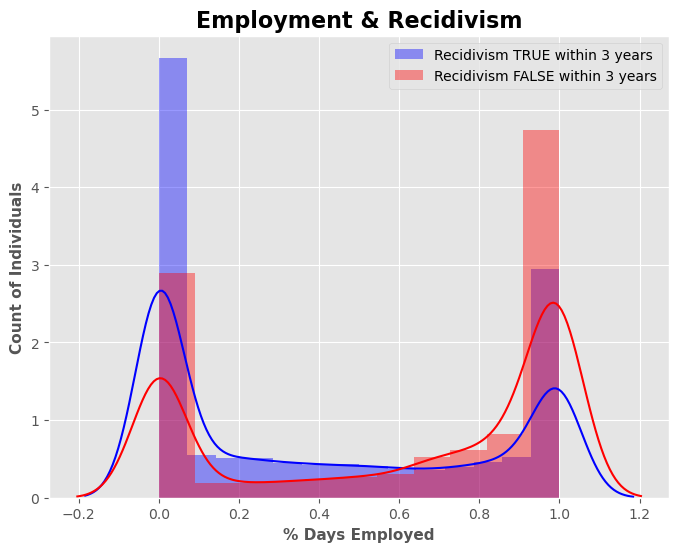

In [250]:
data1 = recid_true[recid_true['Employment_Exempt'] == False]
data2 = recid_false[recid_false['Employment_Exempt'] == False]

plt.figure(figsize=(8,6))
sns.distplot(data1['Percent_Days_Employed'], color='blue',label='Recidivism TRUE within 3 years')
sns.distplot(data2['Percent_Days_Employed'], color='red', label='Recidivism FALSE within 3 years')
plt.legend()
plt.xlabel('% Days Employed', fontweight='bold', fontsize=11)
plt.ylabel('Count of Individuals', fontweight='bold', fontsize=11)
plt.title('Employment & Recidivism', fontsize=16, fontweight='bold');

#export plot
plt.savefig('plots/employment.png',dpi=300, bbox_inches = "tight")

# If an individual is not exempt from working during parole, if they are employed for 60% of the time, they are more likely to not be reincarcerated

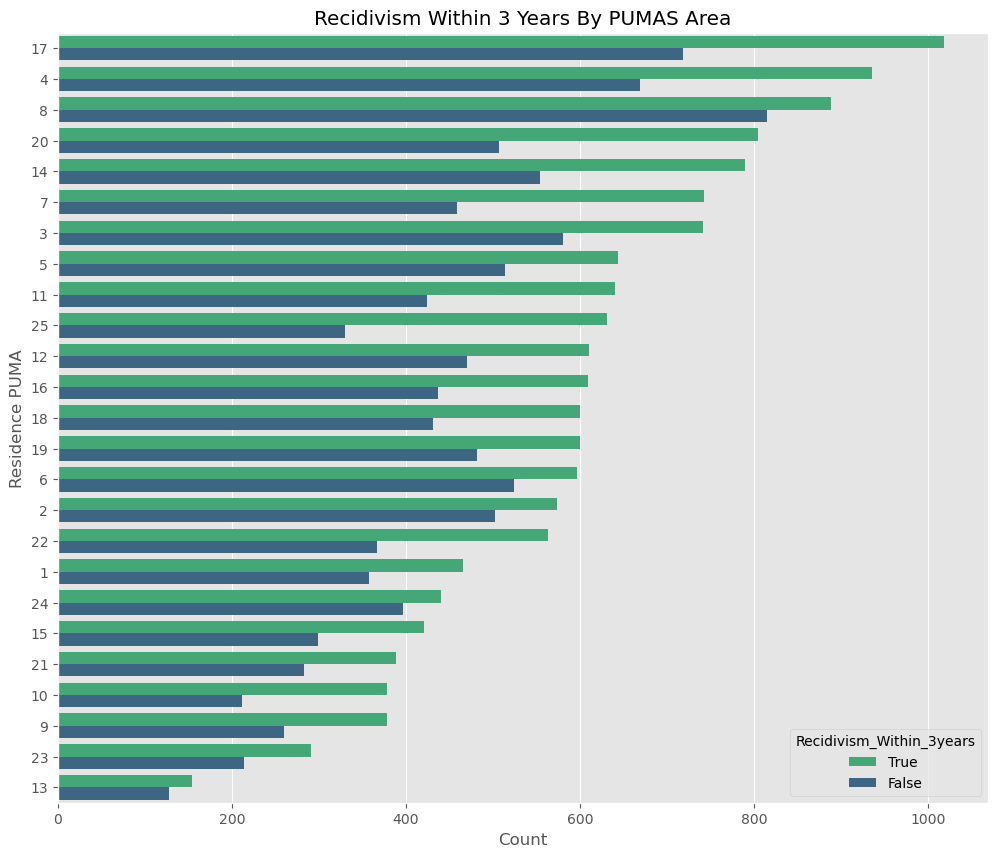

In [251]:
#plot
plt.figure(figsize = (12,10))
sns.countplot(data=recid_df,
              y='Residence_PUMA',
              hue='Recidivism_Within_3years',
              hue_order =[True, False],
              orient='h',
              palette='viridis_r',
              order=recid_df[recid_df['Recidivism_Within_3years'] == True].groupby('Residence_PUMA').count().sort_values('Recidivism_Within_3years', ascending=False).index);

plt.title('Recidivism Within 3 Years By PUMAS Area')
plt.ylabel('Residence PUMA')
plt.xlabel('Count');

#you can see areas where there are less individuals who recidivate. Would be curious to see if we can map all of these areas

In [252]:
#Andrew's notes - try making it a Series rather than a df (single brackets around the recidivism), then use unstack, then sort_by on the True column followed by plotting, but this works.
recid_df.groupby(['Residence_PUMA', 'Recidivism_Within_3years'])[['Recidivism_Within_3years']].count().unstack()

Recidivism_Within_3years      
Recidivism_Within_3years                    False  True
Residence_PUMA                                         
1                         357                      465 
2                         502                      574 
3                         580                      741 
4                         669                      935 
5                         514                      644 
6                         524                      597 
7                         459                      743 
8                         815                      888 
9                         260                      378 
10                        212                      378 
11                        424                      640 
12                        470                      610 
13                        127                      154 
14                        554                      790 
15                        299                      421 
16                        437                      609 
17                        718                      1018
18                        431                      600 
19                        481                      600 
20                        507                      805 
21                        283                      389 
22                        367                      563 
23                        214                      291 
24                        397                      440 
25                        330                      631

In [253]:
recid_t = recid_df[recid_df['Recidivism_Within_3years'] == True].groupby(['Residence_PUMA'])[['Recidivism_Within_3years']].count()
recid_f = recid_df[recid_df['Recidivism_Within_3years'] == False].groupby(['Residence_PUMA'])[['Recidivism_Within_3years']].count()
recid_f.rename(columns={'Recidivism_Within_3years': 'Recidivism_Within_3years_f'}, inplace=True)
recid_t.rename(columns={'Recidivism_Within_3years': 'Recidivism_Within_3years_t'}, inplace=True)

In [254]:
recid = recid_t.join(recid_f)
recid['recid_diff'] = (recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f'])) - (recid['Recidivism_Within_3years_f']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f']))
recid['%recid_true'] = (recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f']))
recid.sort_values(by='%recid_true', ascending=False).head(7)

,Recidivism_Within_3years_t,Recidivism_Within_3years_f,recid_diff,%recid_true
Residence_PUMA,,,,
25,631,330,0.313215,0.656608
10,378,212,0.281356,0.640678
7,743,459,0.236273,0.618136
20,805,507,0.227134,0.613567
22,563,367,0.210753,0.605376
11,640,424,0.203008,0.601504
9,378,260,0.184953,0.592476


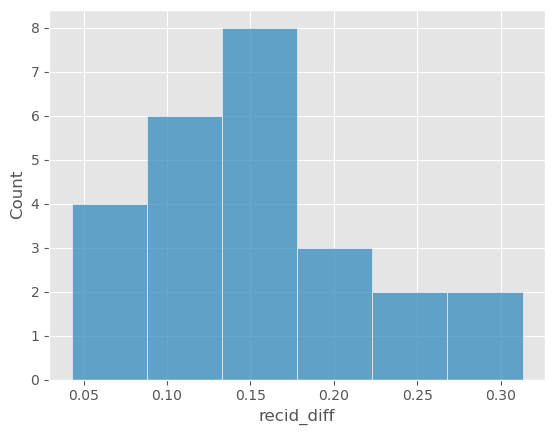

In [255]:
#distribution of difference in recid vs no recid across 23 puma regions
#is there anything similar or obvious about the regions?
sns.histplot(data=recid, x='recid_diff');

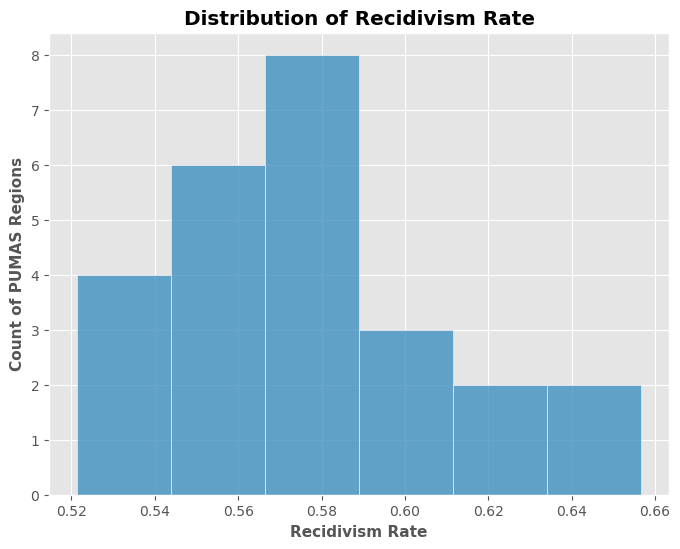

In [256]:
# distribution of recidivism across 23 puma regions

plt.figure(figsize=(8,6))
sns.histplot(data=recid, x='%recid_true', cbar='steelblue')
plt.title('Distribution of Recidivism Rate', fontweight='bold')
plt.ylabel('Count of PUMAS Regions', fontsize=11, fontweight='bold')
plt.xlabel('Recidivism Rate', fontsize=11, fontweight='bold');

#export plot
plt.savefig('plots/recidrate_hist.png',dpi=300, bbox_inches = "tight")

## Gender
---

In [257]:
recid_df[recid_df['Gender'] == 'F'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack()

Age_at_Release,18-22,23-27,28-32,33-37,38-42,43-47,48 or older
Race,,,,,,,
BLACK,33,112,87,70,57,56,59
WHITE,42,170,207,195,142,115,97


### *Across both genders, individuals between the ages between 23-32 are the most likely to recidivate within 3 years*

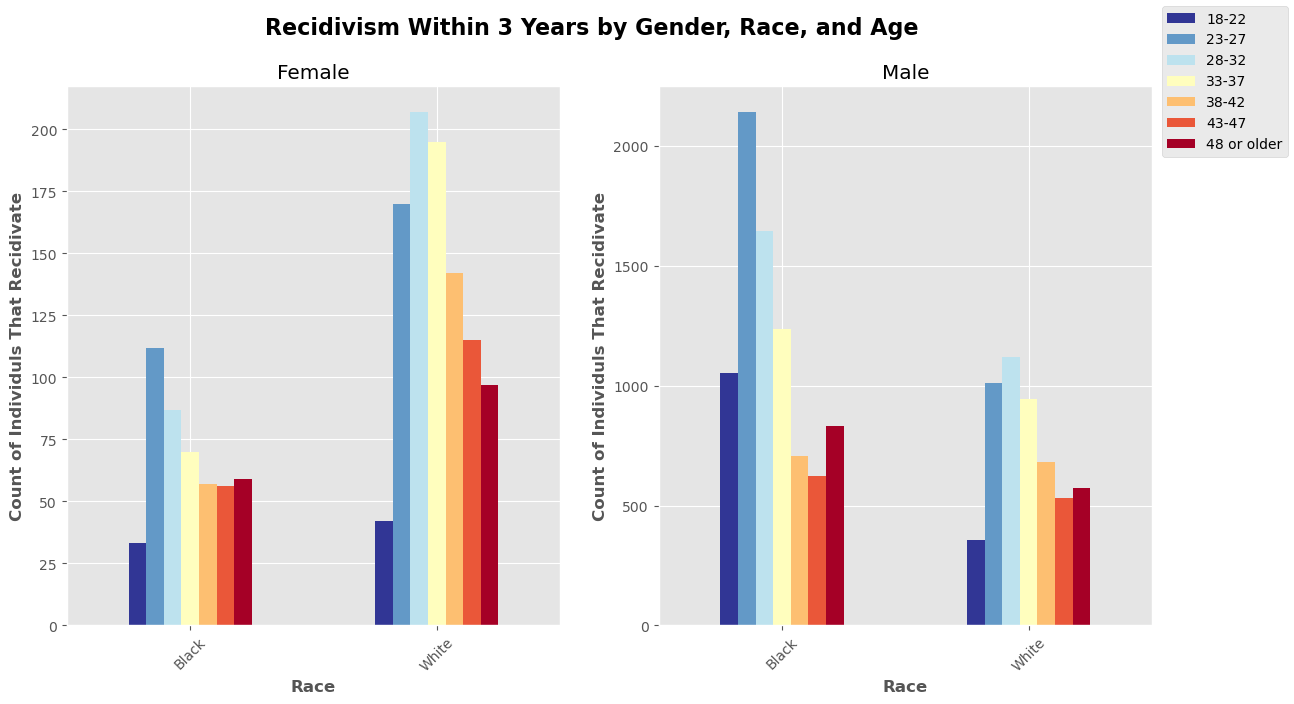

In [258]:
#create subplots
fig, ax = plt.subplots(1,2, figsize=(14,7))

#rocket

recid_df[recid_df['Gender'] == 'F'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar',
                                                                                               cmap='RdYlBu_r', legend=False, ax=ax[0])

recid_df[recid_df['Gender'] == 'M'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar',
                                                                                                cmap='RdYlBu_r',legend=False, ax=ax[1])

fig.suptitle('Recidivism Within 3 Years by Gender, Race, and Age', fontsize=16, fontweight='bold')

#set legend for entire plot
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

#set subplot titles, labels
ax[0].set_title('Female')
ax[1].set_title('Male')
ax[0].set_xlabel('Race', fontweight='bold', fontsize=12)
ax[1].set_xlabel('Race', fontweight='bold', fontsize=12)
ax[0].set_ylabel('Count of Individuls That Recidivate', fontweight='bold', fontsize=12)
ax[1].set_ylabel('Count of Individuls That Recidivate', fontweight='bold', fontsize=12)

# how can I rotate this for both subplots?
# plt.xticks(rotation = 45)
ax[0].set_xticklabels(['Black', 'White'], rotation=45)
ax[1].set_xticklabels(['Black', 'White'], rotation=45);

#export plot
plt.savefig('plots/gender_race_age.png',dpi=300, bbox_inches = "tight")

### Gender with Dependents

### *Across both genders, individuals with either 0 or 3 or more dependents more likely to reoffend*

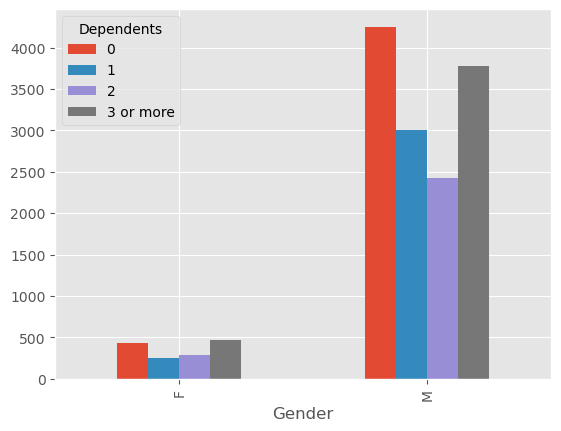

In [259]:
recid_df.groupby(['Gender', 'Dependents'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar');

### *We were curious and wanted to look at age breakdown of those that recid for those that have 0  or 3 or more dependents*
- For those without dependents, 23-27, younger individual are most likely to recid
- For this with 3 ore more dependents, 

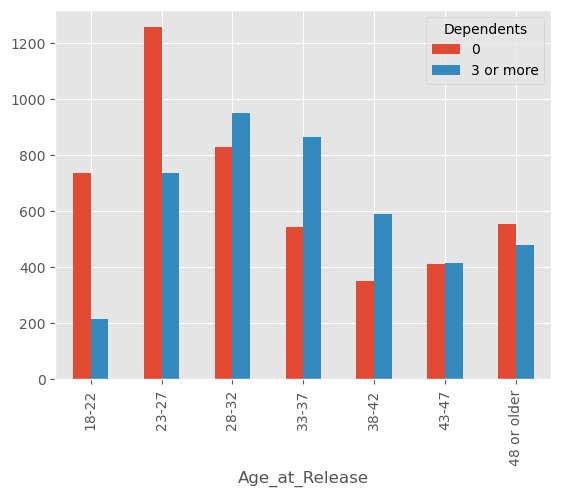

In [260]:
recid_df[(recid_df['Dependents'] == '0') | (recid_df['Dependents'] == '3 or more')].groupby(['Age_at_Release', 'Dependents'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar');

## Residence Puma, Race

In [261]:
# #create subplots
# fig, ax = plt.subplots(1,3, figsize=(17,5))

# ax1 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
# ax2 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
# ax3 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

# ax1.title.set_text('Recidivism in Year 1')
# ax2.title.set_text('Recidivism in Year 2')
# ax3.title.set_text('Recidivism in Year 3')

# ax1.set_ylim(0,22_000)
# ax2.set_ylim(0,22_000)
# ax3.set_ylim(0,22_000)

# # Labels to use in the legend for each line
# labels = ["Recidivism - False", "Recidivism - True"]

# fig.legend([ax1, ax2, ax3], labels=labels,
#            loc="upper right");

- recidivism among female individuals stay pretty constant year to year
- recidivism among male individuals increases year to to year

## Race

In [262]:
# #create subplots
# fig, ax = plt.subplots(1,3, figsize=(17,5))

# ax1 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
# ax2 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
# ax3 = sns.histplot(data=recid_df, x = 'Race', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

# ax1.title.set_text('Recidivism in Year 1')
# ax2.title.set_text('Recidivism in Year 2')
# ax3.title.set_text('Recidivism in Year 3')

# ax1.set_ylim(0,22_000)
# ax2.set_ylim(0,22_000)
# ax3.set_ylim(0,22_000)

# # Labels to use in the legend for each line
# labels = ["Recidivism - False", "Recidivism - True"]

# fig.legend([ax1, ax2, ax3], labels=labels,
#            loc="upper right");

#### Seems like race is less of a factor in recidivism YoY b/c the difference between Black and White re-offenders isn't a huge difference after year 1

In [263]:
# #create subplots
# fig, ax = plt.subplots(1,3, figsize=(17,5))

# ax1 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
# ax2 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
# ax3 = sns.histplot(data=recid_df, x = 'Dependents', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

# ax1.title.set_text('Recidivism in Year 1')
# ax2.title.set_text('Recidivism in Year 2')
# ax3.title.set_text('Recidivism in Year 3')

# ax1.set_ylim(0,7500)
# ax2.set_ylim(0,7500)
# ax3.set_ylim(0,7500)

# # Labels to use in the legend for each line
# labels = ["Recidivism - False", "Recidivism - True"]

# fig.legend([ax1, ax2, ax3], labels=labels,
#            loc="upper right");

#### Interesting to see that recidivism is more prominent if the individual has 0 or 3 or more dependents. 

In [264]:
# #create subplots
# fig, ax = plt.subplots(1,3, figsize=(24,6))

# ax1 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
# ax2 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
# ax3 = sns.histplot(data=recid_df, x = 'Prison_Years', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

# ax1.title.set_text('Recidivism in Year 1')
# ax2.title.set_text('Recidivism in Year 2')
# ax3.title.set_text('Recidivism in Year 3')

# ax1.set_ylim(0,7500)
# ax2.set_ylim(0,7500)
# ax3.set_ylim(0,7500)

# # Labels to use in the legend for each line
# labels = ["Recidivism - False", "Recidivism - True"]

# fig.legend([ax1, ax2, ax3], labels=labels,
#            loc="upper right");

## PUMAS Supplemental Dataset
---

In [266]:
#read in the data
pumas = pd.read_csv('data/census_puma_data.csv')
pumas.head()

,Code,PUMAs_code,region_name,income_to_pov_ratio13,property_val_13
0,1,1003,Atlanta Regional Commission (Central)--Fulton County (Central)--Atlanta City (South) PUMA,235,72527
1,1,4400,Atlanta Regional Commission (Southwest)--Douglas County PUMA,277,94404
2,2,1008,Atlanta Regional Commission (Central)--DeKalb County (South) PUMA,267,77810
3,2,4300,Atlanta & Northeast Georgia Regional Commissions--Newton & Rockdale Counties PUMA,273,91019
4,3,1200,Heart of Georgia Altamaha Regional Commission (Southeast) PUMA,206,56918


In [267]:
pumas_df = pumas.groupby('Code')[['income_to_pov_ratio13']].mean().sort_values(by='income_to_pov_ratio13', ascending=False)
pumas_df.head(2)

,income_to_pov_ratio13
Code,
12,325.428571
15,321.000000


In [268]:
recid['recidt_%puma'] = recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'].sum())

In [269]:
df = recid[['recidt_%puma']]
pumas_df = pumas_df.join(df)

In [270]:
pumas_df.sort_values(by='recidt_%puma', ascending=False)

,income_to_pov_ratio13,recidt_%puma
Code,,
17,244.500000,0.068304
4,246.000000,0.062735
8,263.000000,0.059581
20,263.333333,0.054012
14,285.250000,0.053006
7,238.666667,0.049852
3,205.000000,0.049718
5,223.000000,0.043210
11,274.000000,0.042941


<Figure size 600x800 with 0 Axes>

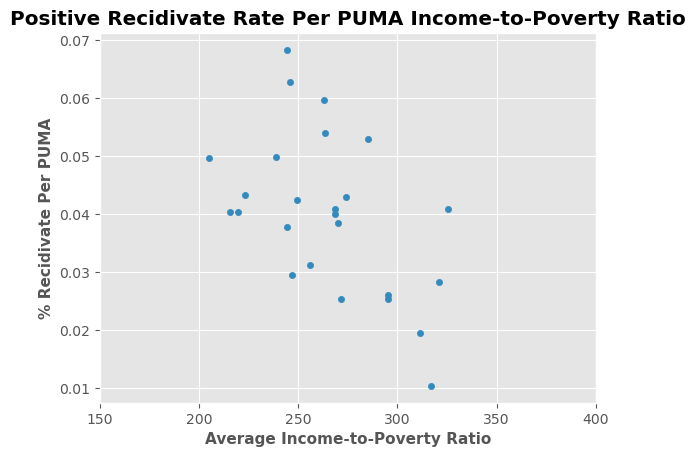

In [271]:
plt.figure(figsize=(6,8))
pumas_df.plot.scatter(x='income_to_pov_ratio13', 
                      y='recidt_%puma')

plt.title('Positive Recidivate Rate Per PUMA Income-to-Poverty Ratio', fontweight='bold')
plt.xlabel('Average Income-to-Poverty Ratio', fontsize=11, fontweight='bold')
plt.ylabel('% Recidivate Per PUMA', fontsize=11, fontweight='bold')
plt.xlim(150,400);

#export plot
plt.savefig('plots/recidrateperpuma.png',dpi=300, bbox_inches = "tight")

# the income-to-poverty ratio increases, recidivism decreases in PUMAS regions

## Gang Affiliation

<AxesSubplot:xlabel='Gang_Affiliated'>

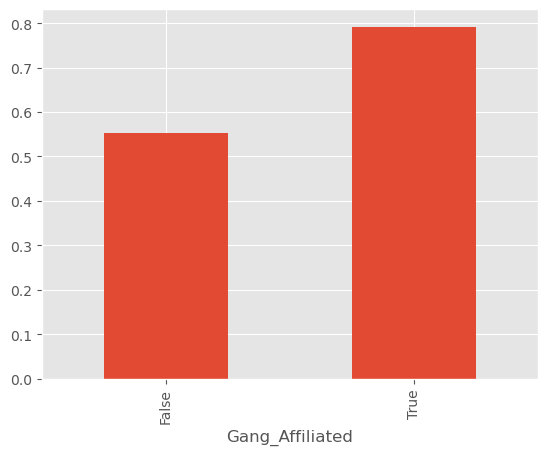

In [281]:
gang_affil = recid_df.groupby('Gang_Affiliated').agg({'Recidivism_Within_3years': 'sum', 'ID': 'count'})
gang_affil['recid_rate'] = gang_affil['Recidivism_Within_3years'] / gang_affil['ID']
gang_affil = gang_affil.drop(columns = ['Recidivism_Within_3years', 'ID'])
gang_affil.plot(kind='bar', legend=False)

In [276]:
gang_affil_t = recid_df[recid_df['Gang_Affiliated'] == True].groupby(['Prison_Offense']).agg({'Recidivism_Within_3years': 'sum', 'ID': 'count'})
gang_affil_t['recid_rate'] = gang_affil_t['Recidivism_Within_3years'] / gang_affil2['ID']
gang_affil_t.head()

,Recidivism_Within_3years,ID,recid_rate
Prison_Offense,,,
Drug,410,510,0.803922
Other,380,480,0.791667
Property,1007,1217,0.827445
Violent/Non-Sex,933,1231,0.757920
Violent/Sex,52,77,0.675325


In [277]:
gang_affil_f = recid_df[recid_df['Gang_Affiliated'] == False].groupby(['Prison_Offense']).agg({'Recidivism_Within_3years': 'sum', 'ID': 'count'})
gang_affil_f['recid_rate'] = gang_affil_f['Recidivism_Within_3years'] / gang_affil_f['ID']
gang_affil_f.head()

,Recidivism_Within_3years,ID,recid_rate
Prison_Offense,,,
Drug,2005,3818,0.525144
Other,1217,2068,0.588491
Property,3663,5817,0.629706
Violent/Non-Sex,1868,3763,0.496412
Violent/Sex,210,753,0.278884


In [292]:
gang_df = recid_df.groupby(['Prison_Offense', 'Gang_Affiliated']).agg({'Recidivism_Within_3years': 'sum', 'ID': 'count'})
gang_df['recid_rate'] = gang_df['Recidivism_Within_3years'] / gang_df['ID']
gang_df.drop(columns=['Recidivism_Within_3years', 'ID'], inplace=True)
gang_df

recid_rate
Prison_Offense  Gang_Affiliated            
Drug            False            0.525144  
                True             0.803922  
Other           False            0.588491  
                True             0.791667  
Property        False            0.629706  
                True             0.827445  
Violent/Non-Sex False            0.496412  
                True             0.757920  
Violent/Sex     False            0.278884  
                True             0.675325

In [354]:
gang_df

recid_rate
Prison_Offense  Gang_Affiliated            
Drug            False            0.525144  
                True             0.803922  
Other           False            0.588491  
                True             0.791667  
Property        False            0.629706  
                True             0.827445  
Violent/Non-Sex False            0.496412  
                True             0.757920  
Violent/Sex     False            0.278884  
                True             0.675325

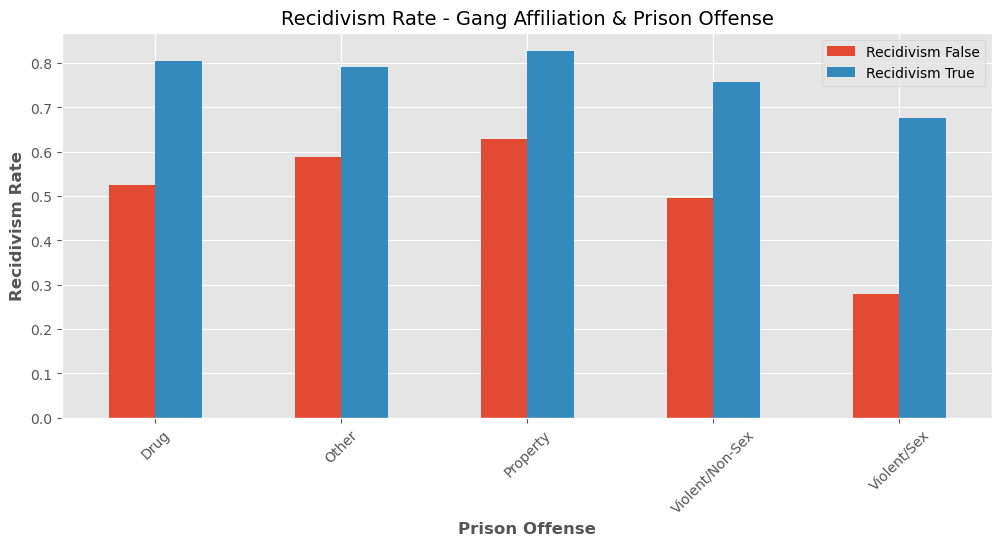

In [367]:
gang_df.sort_values(by=['recid_rate', 'Gang_Affiliated']).unstack().plot(kind='bar',
                                                                         figsize=(12,5),
                                                                         legend=False)
labels = ['Recidivism False', 'Recidivism True']

plt.legend(labels)
plt.title('Recidivism Rate - Gang Affiliation & Prison Offense', fontsize=14)
plt.ylabel('Recidivism Rate', fontweight='bold')
plt.xlabel('Prison Offense', fontweight='bold')
plt.xticks(rotation=45);

#export plot
plt.savefig('plots/gangaffil_prisonoffense.png',dpi=300, bbox_inches = "tight")

### Writing a Function to Plot Analysis of Categorical Columns

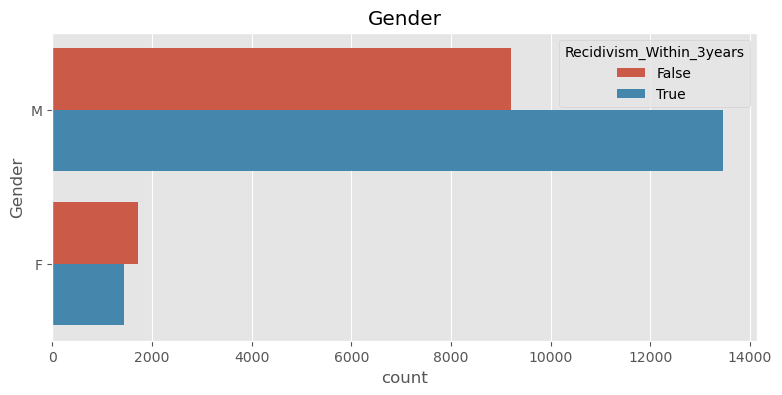

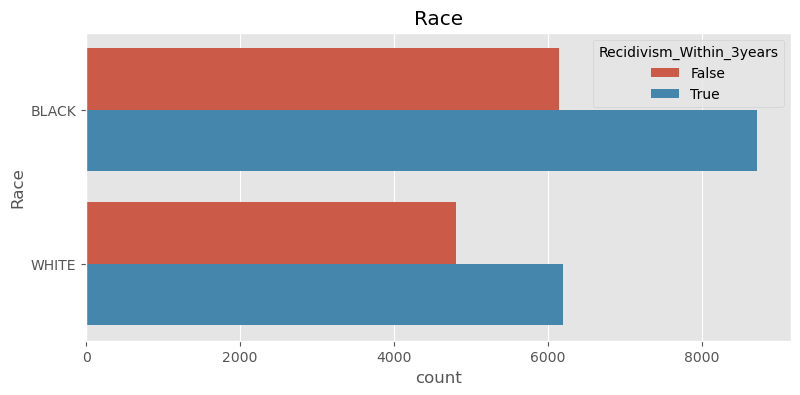

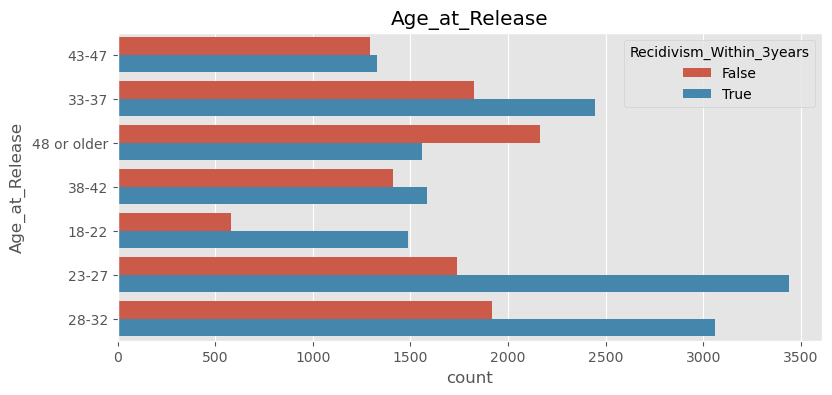

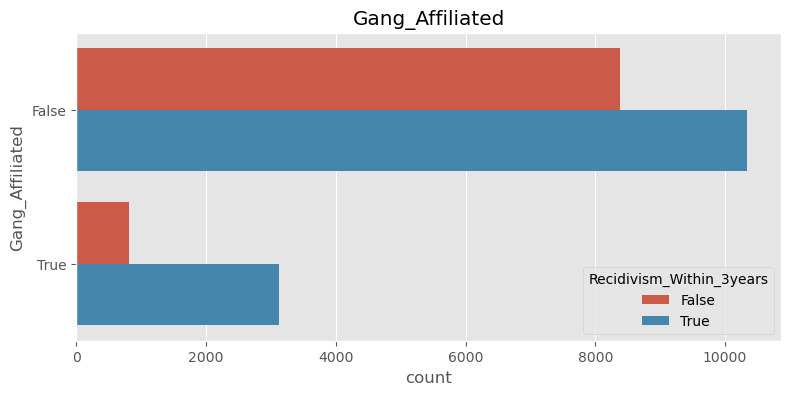

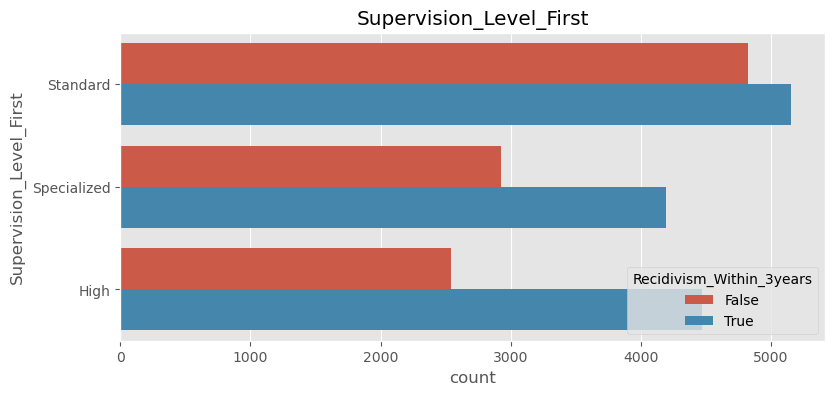

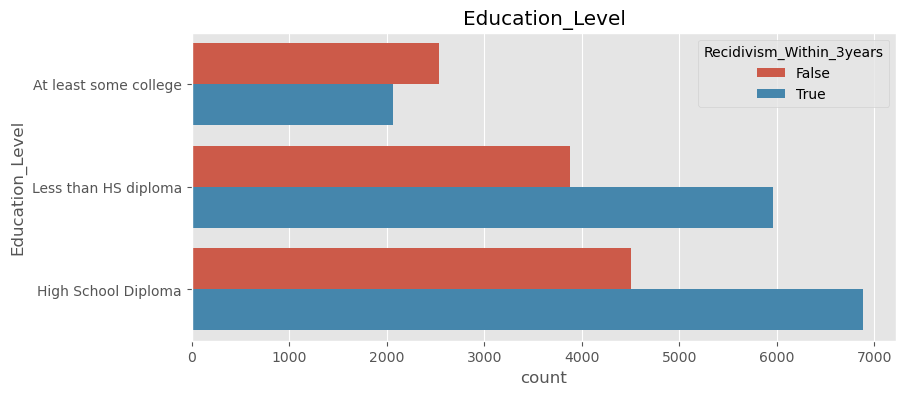

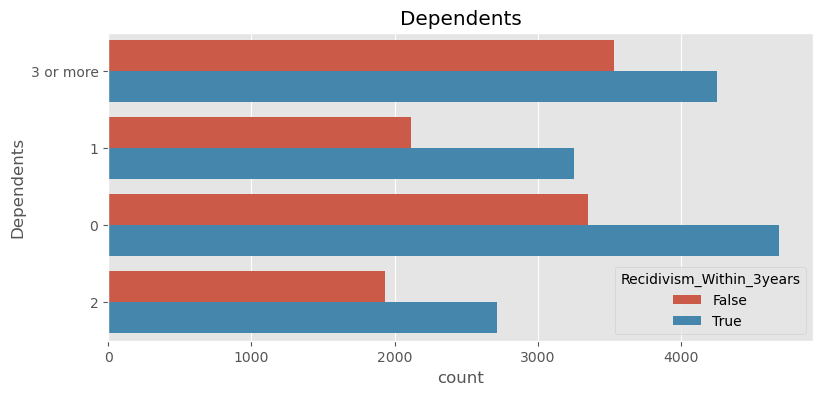

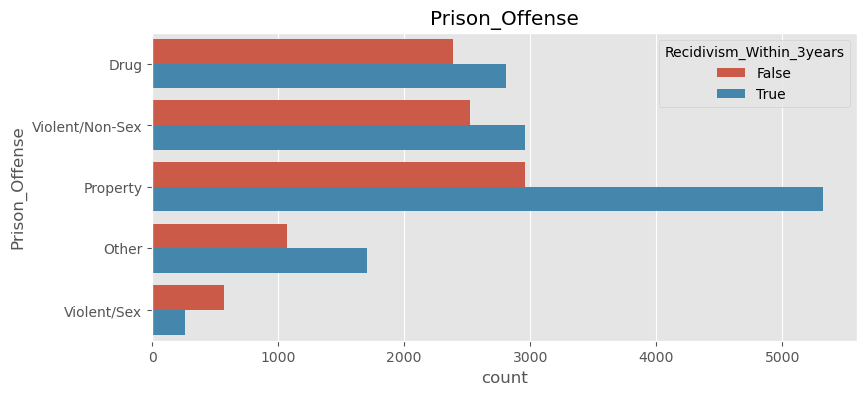

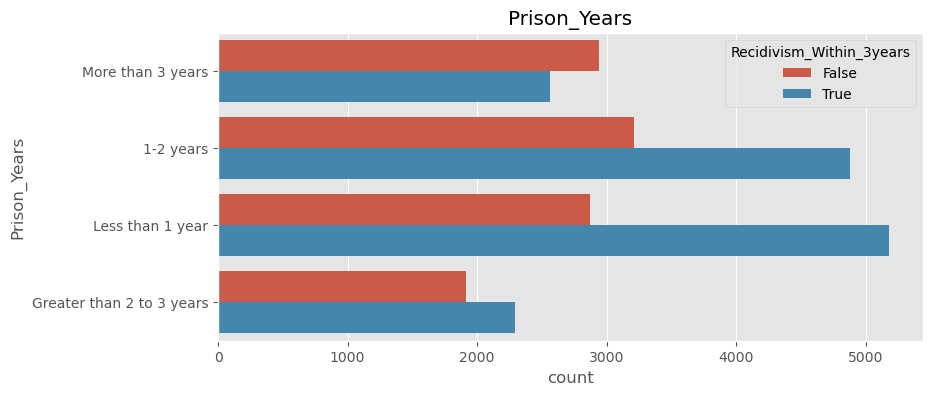

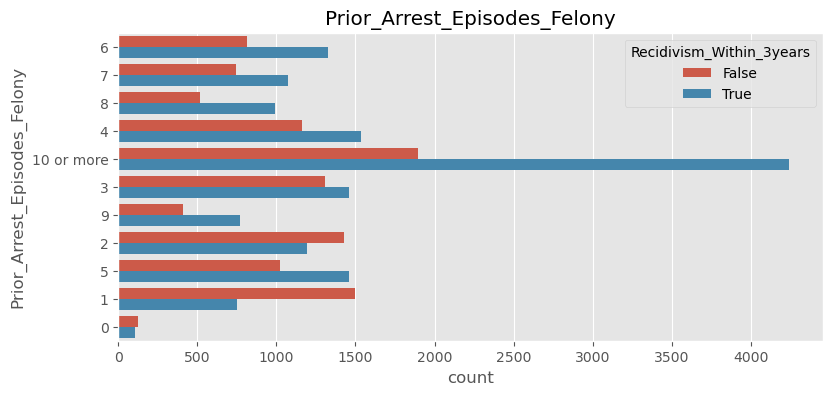

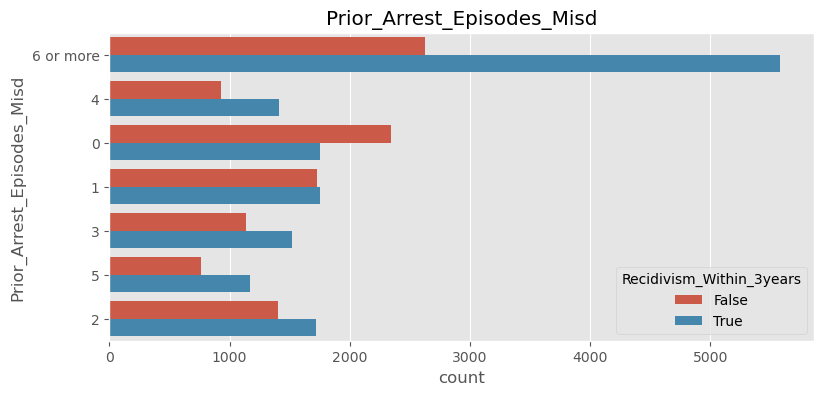

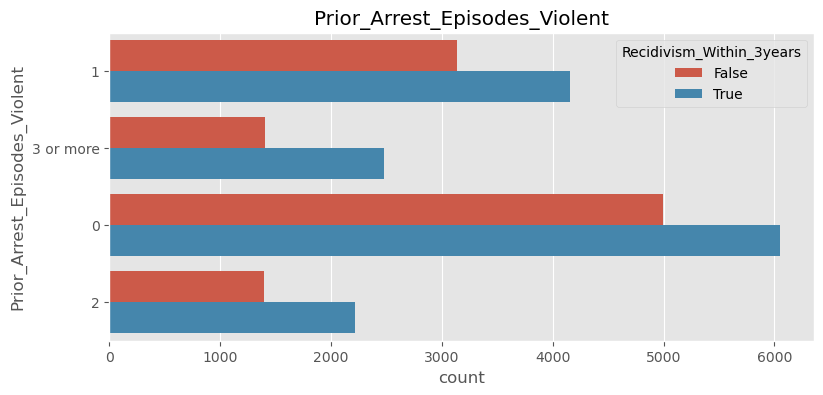

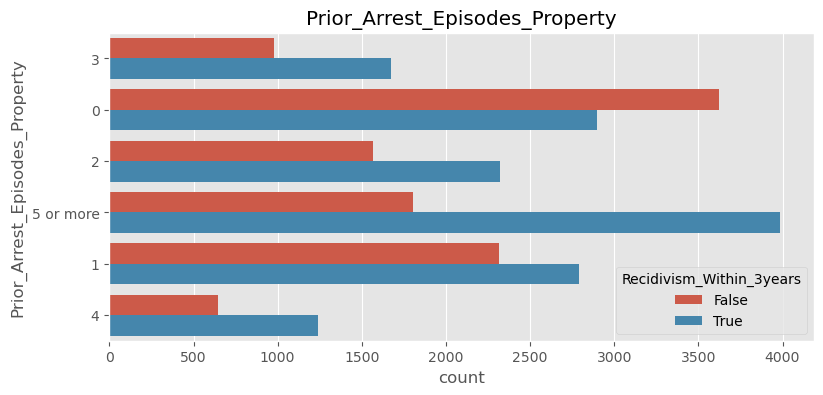

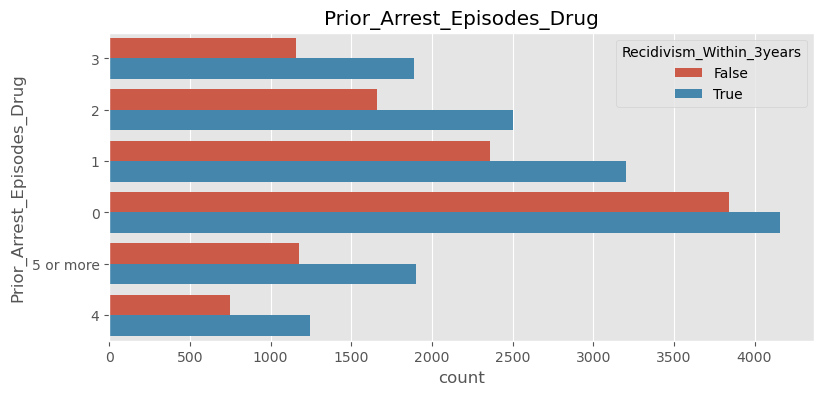

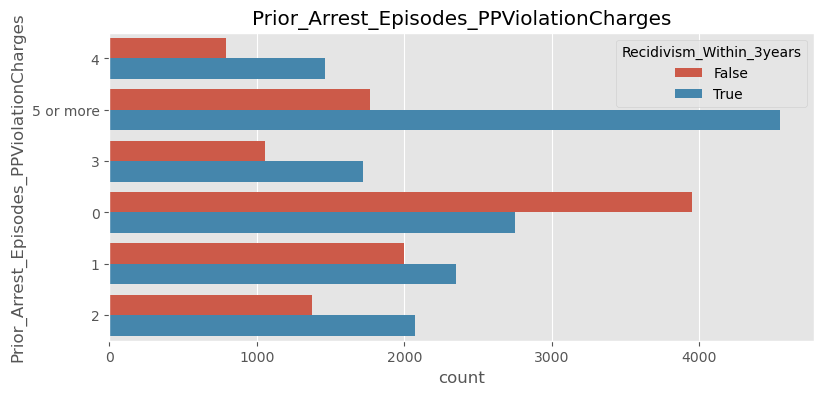

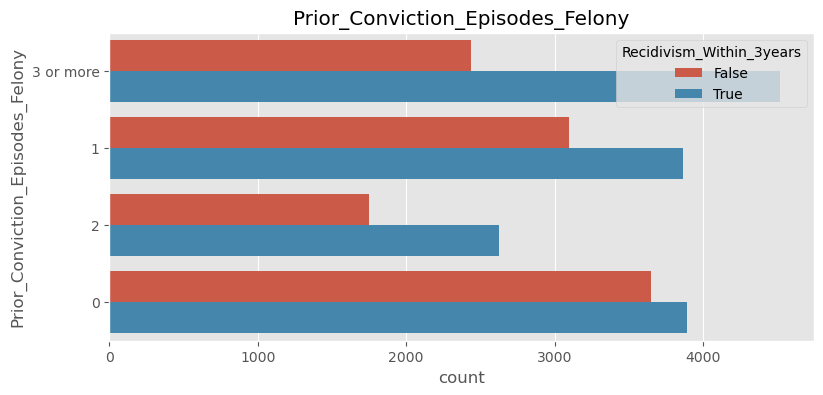

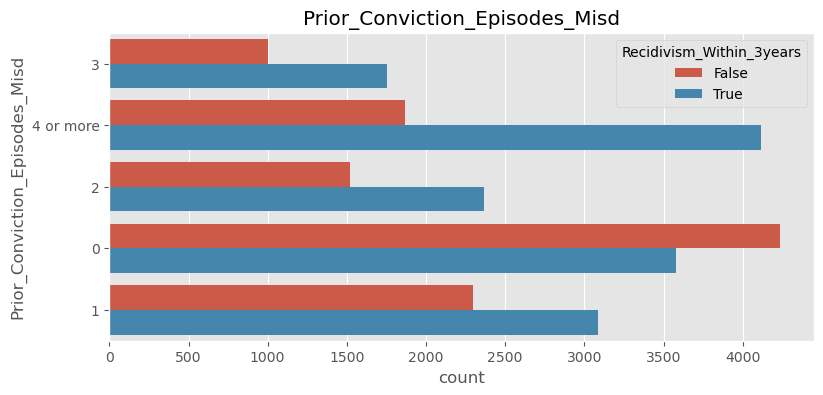

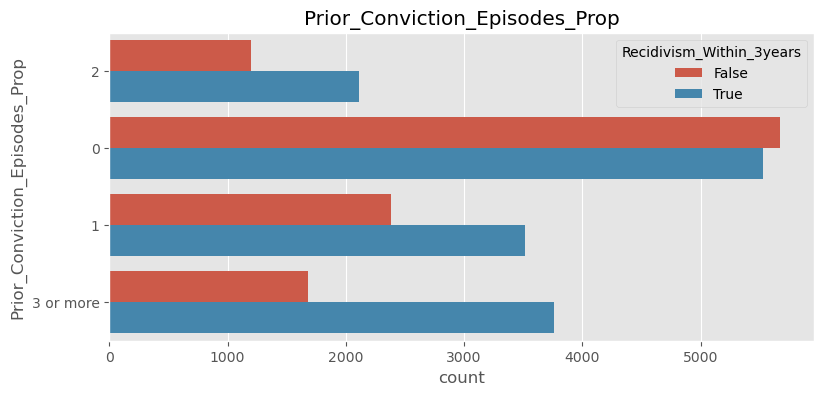

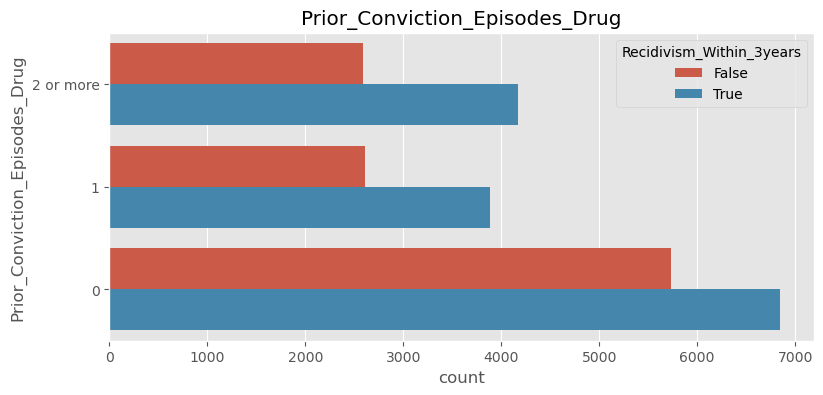

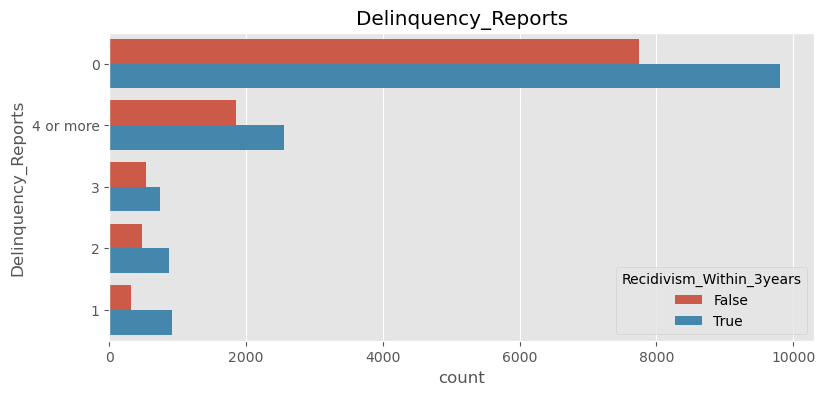

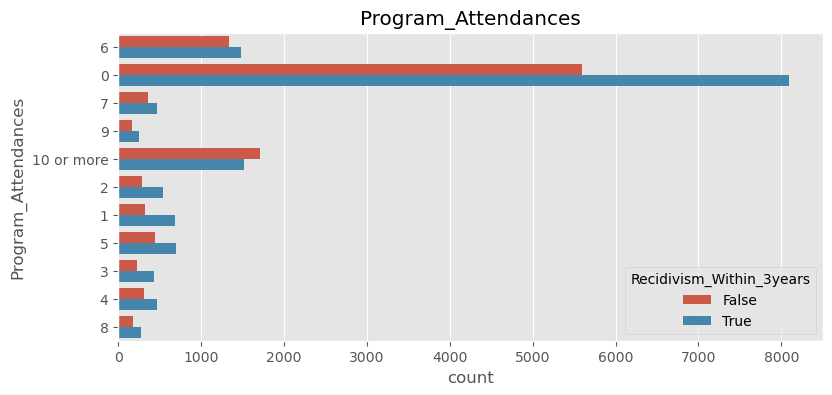

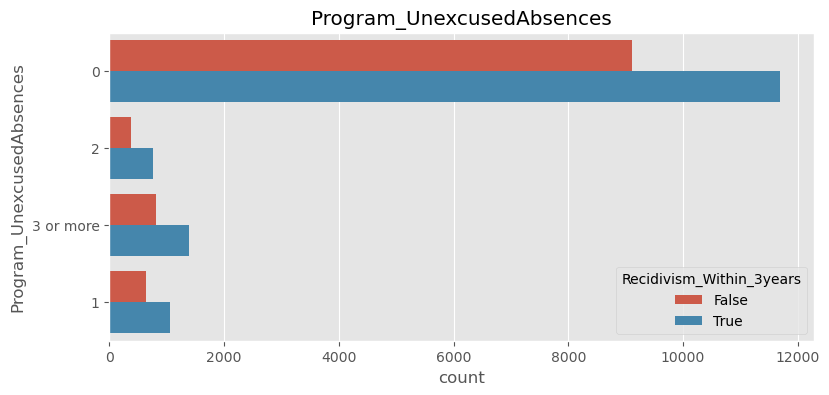

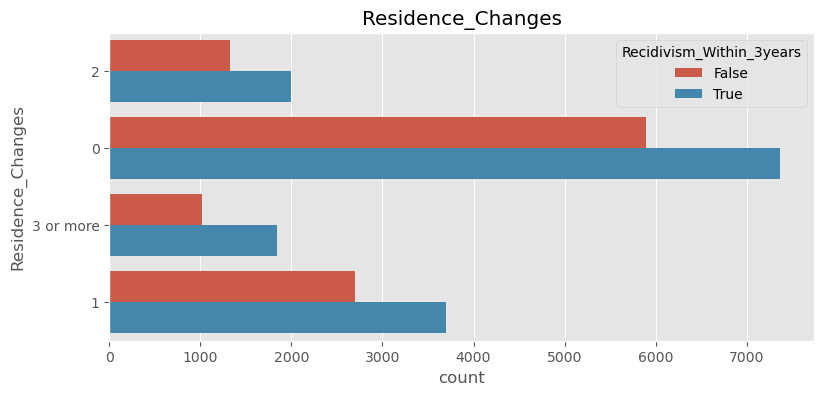

In [265]:
# reference - https://www.kaggle.com/code/rashmiranu/banking-dataset-eda-and-binary-classification

cols = df_cat.columns.values
plt.style.use("ggplot")

for c in cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(y=recid_df[c], hue=recid_df['Recidivism_Within_3years'], orient='h')
    plt.title(c)